<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 26.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 3.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [9]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [10]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
df=pd.read_csv('/content/driver/My Drive/LSTM_Model/BitcoinDataDaily.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2558, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,270.826996,272.334991,267.085999,269.227997,269.227997,40301200
1,2015-07-10,269.156006,294.591003,268.802002,284.894012,284.894012,100390000
2,2015-07-11,284.880005,298.506012,283.529999,293.114990,293.114990,41109900
3,2015-07-12,293.140015,314.394012,292.505005,310.867004,310.867004,56405000
4,2015-07-13,310.826996,310.947998,281.010986,292.053986,292.053986,62053900
...,...,...,...,...,...,...,...
2553,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2554,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2555,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520
2556,2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488


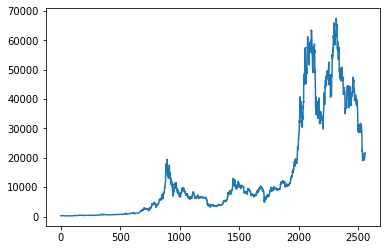

In [12]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [16]:
# Train test split
#to_row = int(len(df)*0.667)
to_row = int(len(df)*0.7)
print(to_row)

1790


In [17]:
#training_data = list(df[0:to_row]['Adj Close'])
#testing_data = list(df[to_row:]['Adj Close'])
training_data = list(df[0:1790]['Adj Close'])
testing_data = list(df[1790:]['Adj Close'])
testing_data

[9529.803711,
 9656.717773,
 9800.636719,
 9665.533203,
 9653.679688,
 9758.852539,
 9771.489258,
 9795.700195,
 9870.094727,
 9321.78125,
 9480.84375,
 9475.277344,
 9386.788086,
 9450.702148,
 9538.024414,
 9480.254883,
 9411.84082,
 9288.018555,
 9332.34082,
 9303.629883,
 9648.717773,
 9629.658203,
 9313.610352,
 9264.813477,
 9162.917969,
 9045.390625,
 9143.582031,
 9190.854492,
 9137.993164,
 9228.325195,
 9123.410156,
 9087.303711,
 9132.488281,
 9073.942383,
 9375.474609,
 9252.277344,
 9428.333008,
 9277.967773,
 9278.807617,
 9240.34668,
 9276.5,
 9243.614258,
 9243.213867,
 9192.836914,
 9132.227539,
 9151.392578,
 9159.040039,
 9185.817383,
 9164.231445,
 9374.887695,
 9525.363281,
 9581.072266,
 9536.892578,
 9677.113281,
 9905.166992,
 10990.873047,
 10912.823242,
 11100.467773,
 11111.213867,
 11323.466797,
 11759.592773,
 11053.614258,
 11246.348633,
 11205.892578,
 11747.022461,
 11779.773438,
 11601.472656,
 11754.045898,
 11675.739258,
 11878.111328,
 11410.525391,


In [18]:
print (len(training_data))
print(len(testing_data))

1790
768


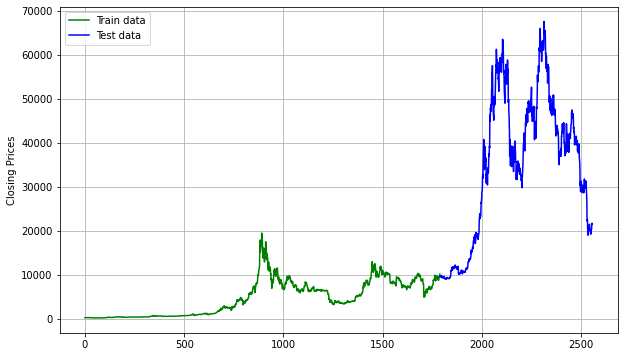

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True)
#plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label= 'Test data')
plt.legend()

In [20]:
model_predict = []
n_test_ob = len(testing_data)   
n_test_ob

768

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_ob):
  #model = ARIMA(testing_data, order=(1,1,1))
  model = sm.tsa.arima.ARIMA(testing_data, order=(1,1,1))
  #model = sm.tsa.ARIMA(testing_data, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  #yhat = output[0]
  yhat = list(output[0])[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  print('predicted=%f, expected=%f' % (yhat, actual_test_value))

In [22]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_ob):
  model = sm.tsa.arima.ARIMA(testing_data, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  print('predicted=%f, expected=%f' % (yhat, actual_test_value))

predicted=21522.488795, expected=9529.803711
predicted=21522.488795, expected=9656.717773
predicted=21522.488795, expected=9800.636719
predicted=21522.488795, expected=9665.533203
predicted=21522.488795, expected=9653.679688
predicted=21522.488795, expected=9758.852539
predicted=21522.488795, expected=9771.489258
predicted=21522.488795, expected=9795.700195
predicted=21522.488795, expected=9870.094727
predicted=21522.488795, expected=9321.781250
predicted=21522.488795, expected=9480.843750
predicted=21522.488795, expected=9475.277344
predicted=21522.488795, expected=9386.788086
predicted=21522.488795, expected=9450.702148
predicted=21522.488795, expected=9538.024414
predicted=21522.488795, expected=9480.254883
predicted=21522.488795, expected=9411.840820
predicted=21522.488795, expected=9288.018555
predicted=21522.488795, expected=9332.340820
predicted=21522.488795, expected=9303.629883
predicted=21522.488795, expected=9648.717773
predicted=21522.488795, expected=9629.658203
predicted=

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  768
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6687.330
Date:                Sat, 09 Jul 2022   AIC                          13380.659
Time:                        13:31:24   BIC                          13394.587
Sample:                             0   HQIC                         13386.020
                                - 768                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0802      1.035     -0.078      0.938      -2.108       1.947
ma.L1          0.0494      1.038      0.048      0.962      -1.985       2.084
sigma2      2.202e+06      7e+04     31.466      0.000    2.06e+06    2.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               368.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
len(model_predict)

768

In [25]:
len(testing_data)

768

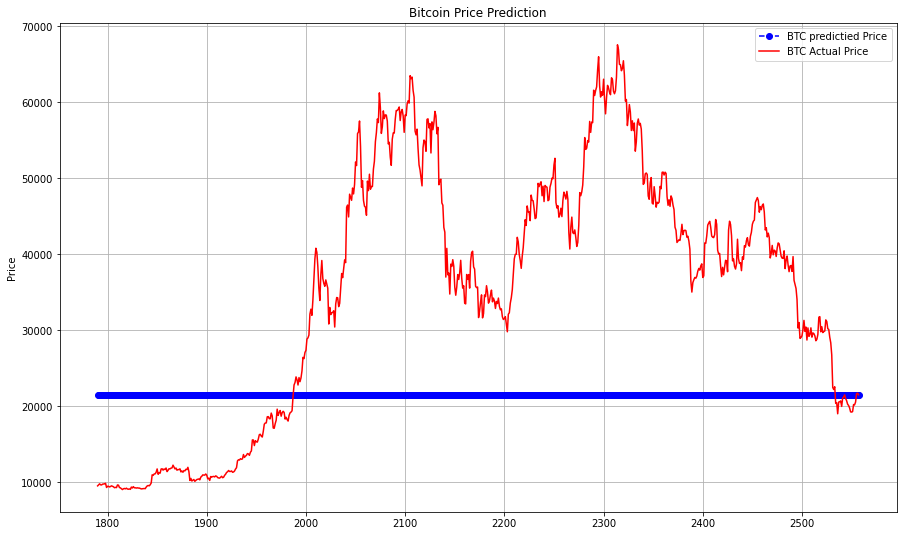

In [27]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[1790:].index

plt.plot(date_range , model_predict[:], color = 'blue', marker = 'o', linestyle ='dashed', label = 'BTC predictied Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
#plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [28]:
#report performance
mape = np.mean(np.abs(np.array(model_predict[:]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.5665250625105852


In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(testing_data, model_predict[:])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 21403.205216
